Notebook to implement population model gradient descent to learn parametesr such as p_sympt, p_severe, p_hosp

In [1]:
import datetime
import turicreate as tc
import matplotlib.pyplot as plt
covidestim_csv = 'covidestim.csv'
estimates = tc.SFrame(covidestim_csv)
print(estimates['state'].unique())
state_long = 'Massachusetts'
state_short = 'MA' 

%load_ext autoreload
%autoreload 2
from PopulationData_ag import PopulationData
from HospitalData_v20210203 import HospitalData
# import random
import autograd

training_mid_dates = [20200901,  20201120] # start mid end, where forecasting happens from mid to end
# training_mid_dates = [20201010,  20201120] # start mid end, where forecasting happens from mid to end
forecast_duration = 80
training_end_dates = [int((datetime.datetime.strptime(str(d),'%Y%m%d') 
                       + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d')) for d in training_mid_dates]


# print(training_end_dates)
def make_forecastable_csv(date):
    pd_dummy = PopulationData(covidestim_csv, state_long,'20200711', date, forecast=False);
    pd_dummy.filtered_data.save(state_short+ '_forecast_after_' + str(date) + '.csv', format='csv') 

hd_truthful = HospitalData('CT_HHS_data.csv', state_short,'20200711','20210305')
pd_truthful = PopulationData(covidestim_csv, state_long,'20200711', '20210305', forecast=False);
# pd_truthful.filtered_data['date'].unique().sort()[-10:-1]

for d in training_mid_dates:
    make_forecastable_csv(d)

pd_list = []
for i,(m,e) in enumerate(zip(training_mid_dates,training_end_dates)):
    pd_list += [PopulationData(state_short+ '_forecast_after_'+str(m) + '.csv',state_long,'20200711',str(e), training_mode=True, debug_mode=True)]



pd_list_train = pd_list[0:-1]
pd_list_val = pd_list[-1:]

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.256877 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.293949 secs.

['Missouri', 'District of Columbia', 'Oregon', 'New Hampshire', 'Florida', 'Georgia', 'Mississippi', 'Kansas', 'South Dakota', 'Delaware', 'Hawaii', 'Rhode Island', 'Wisconsin', 'Tennessee', 'New Jersey', 'Utah', 'Colorado', 'New Mexico', 'New York', 'Puerto Rico', 'Louisiana', 'Michigan', 'Vermont', 'Arkansas', 'Nebraska', 'Oklahoma', 'West Virginia', 'Maine', 'Alaska', 'Nevada', 'North Carolina', 'California', 'Indiana', 'Ohio', 'Texas', 'Idaho', 'Washington', 'Arizona', 'Minnesota', 'Iowa', 'Illinois', 'Kentucky', 'South Carolina', 'Montana', 'Massachusetts', 'Virginia', 'Pennsylvania', 'Wyoming', 'Connecticut', 'Alabama', 'Maryland', 'North Dakota']


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 100 lines in 0.06648 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,int,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 21004 lines in 0.039837 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.268297 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.2605 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.249803 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.289727 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.32746 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.192571 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/MA_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.02867 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,str,str,float,str,str,float,float,str,str,float,str,str,str,str,float,str,str,float,str,str,float,str,str,float,str,str,int,str,str,float,str,str,float,float,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/MA_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.009725 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.17934 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.177963 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/MA_forecast_after_20201120.csv

Parsing completed. Parsed 100 lines in 0.025559 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,str,str,float,str,str,float,float,str,str,float,str,str,str,str,float,str,str,float,str,str,float,str,str,float,str,str,int,str,str,float,str,str,float,float,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/MA_forecast_after_20201120.csv

Parsing completed. Parsed 133 lines in 0.006581 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.214463 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.235873 secs.

In [2]:
hd_truthful.filtered_data

previous_day_admission_adult_covid_confirmed ...,total_adult_patients_hospitalized_confirmed_covid ...,staffed_icu_adult_patients_confirmed_covid ...,previous_day_admission_adult_covid_confirmed_c ...,total_adult_patients_hospitalized_confirmed_co ...
None,None,None,0,0
None,None,None,0,0
None,None,None,0,0
22,165,31,48,48
20,175,38,67,68
33,176,31,67,68
26,164,26,67,69
21,173,29,67,69
23,177,31,67,70
19,168,29,68,71


1498.2379605924439 loss at iteration  0 *** gradients_cummsum =  0.0021725963380088403


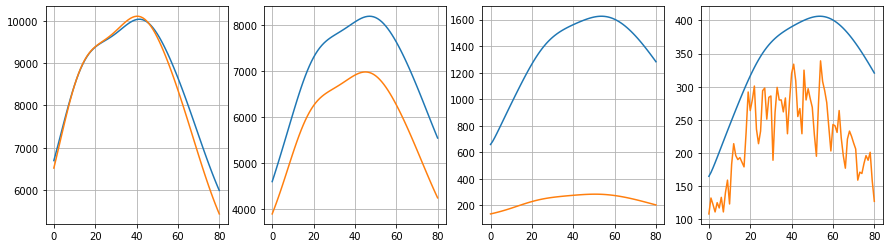

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218} 

1463.687303849729 loss at iteration  1 *** gradients_cummsum =  0.0021370267080391032
1430.213856511175 loss at iteration  2 *** gradients_cummsum =  0.002101965976518011
1397.786568957147 loss at iteration  3 *** gradients_cummsum =  0.0020674077465083155
1366.375212999787 loss at iteration  4 *** gradients_cummsum =  0.0020333457205619727
1335.9503612510823 loss at iteration  5 *** gradients_cummsum =  0.00199977369760232


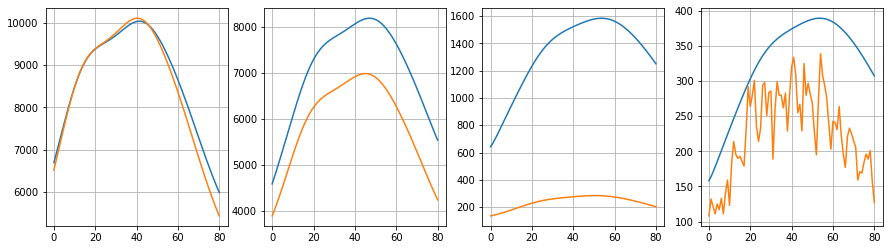

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8188297040114506, 'prob_severe': 0.19509346325080912, 'prob_hosp': 0.2460888891493833, 'prob_soujourn_inf_alpha': 3.410018319963766, 'prob_soujourn_inf_beta': 0.604899364509047, 'prob_soujourn_symp_alpha': 1.620050490586785, 'prob_soujourn_symp_beta': 0.21764504714022462} 

1306.483367057554 loss at iteration  6 *** gradients_cummsum =  0.001966685569911778
1277.9463449811713 loss at iteration  7 *** gradients_cummsum =  0.001934075320223249
1250.3121518070902 loss at iteration  8 *** gradients_cummsum =  0.0019019370189126733
1223.554368059539 loss at iteration  9 *** gradients_cummsum =  0.0018702648212913303
1197.647280008062 loss at iteration  10 *** gradients_cummsum =  0.0018390529649909284


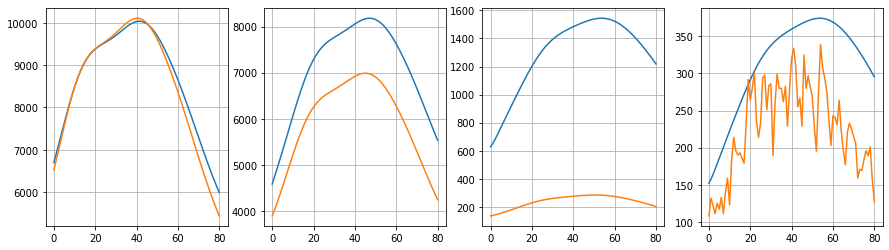

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8177700306534933, 'prob_severe': 0.1905445771447836, 'prob_hosp': 0.24249534101193074, 'prob_soujourn_inf_alpha': 3.410034693317116, 'prob_soujourn_inf_beta': 0.6048093866130807, 'prob_soujourn_symp_alpha': 1.620095763863632, 'prob_soujourn_symp_beta': 0.217326042839882} 

1172.5658621470495 loss at iteration  11 *** gradients_cummsum =  0.0018082957674472092
1148.2857601322264 loss at iteration  12 *** gradients_cummsum =  0.0017779876234736882
1124.783274158511 loss at iteration  13 *** gradients_cummsum =  0.0017481230029224746
1102.0353427642824 loss at iteration  14 *** gradients_cummsum =  0.0017186964484404946
1080.0195270477652 loss at iteration  15 *** gradients_cummsum =  0.0016897025733026622


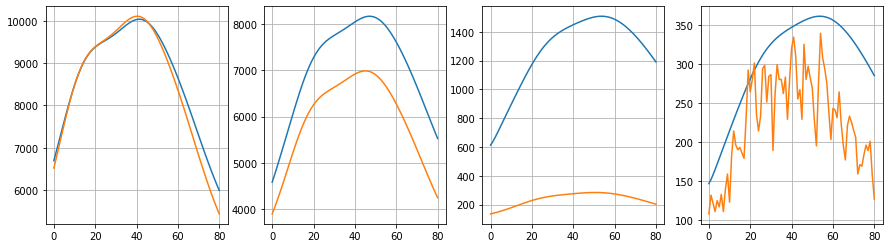

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8168106367041829, 'prob_severe': 0.18633221664626465, 'prob_hosp': 0.23919677401757916, 'prob_soujourn_inf_alpha': 3.410049306816254, 'prob_soujourn_inf_beta': 0.6047290469761648, 'prob_soujourn_symp_alpha': 1.6201363094789856, 'prob_soujourn_symp_beta': 0.21703970722619476} 

1058.7139952818743 loss at iteration  16 *** gradients_cummsum =  0.001661136059336879
1038.0975079144223 loss at iteration  17 *** gradients_cummsum =  0.0016329916549251452
1018.1494029411751 loss at iteration  18 *** gradients_cummsum =  0.0016052641730885744
998.8495816398034 loss at iteration  19 *** gradients_cummsum =  0.0015779484896473203
980.1784946532557 loss at iteration  20 *** gradients_cummsum =  0.0015510395414605434


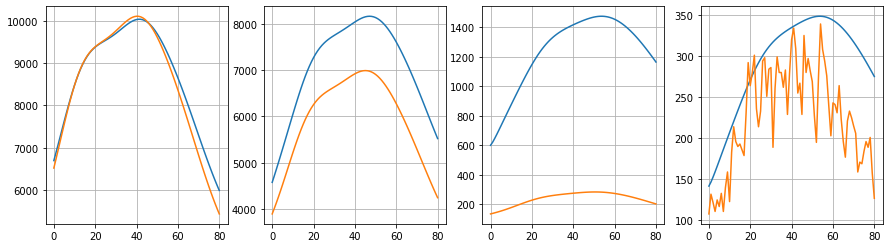

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.815942154864458, 'prob_severe': 0.18243612495539327, 'prob_hosp': 0.2361718603478187, 'prob_soujourn_inf_alpha': 3.410062328756697, 'prob_soujourn_inf_beta': 0.6046574264468502, 'prob_soujourn_symp_alpha': 1.620172570605933, 'prob_soujourn_symp_beta': 0.21678305507295592} 

962.1171284116186 loss at iteration  21 *** gradients_cummsum =  0.0015245323247340015
944.6469918819664 loss at iteration  22 *** gradients_cummsum =  0.0014984218934077532
927.750103636191 loss at iteration  23 *** gradients_cummsum =  0.001472703357608885
911.4089792272136 loss at iteration  24 *** gradients_cummsum =  0.0014473718821740394
895.6066188643998 loss at iteration  25 *** gradients_cummsum =  0.0014224226852392395


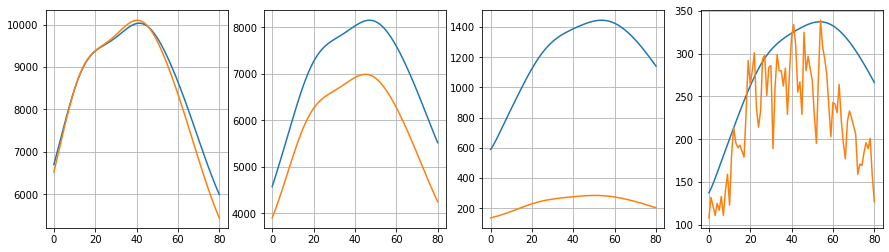

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.815156097417526, 'prob_severe': 0.17883687046454066, 'prob_hosp': 0.23340048026902602, 'prob_soujourn_inf_alpha': 3.4100739109383524, 'prob_soujourn_inf_beta': 0.6045936954928602, 'prob_soujourn_symp_alpha': 1.620204948574563, 'prob_soujourn_symp_beta': 0.21655336919442378} 

880.326495379407 loss at iteration  26 *** gradients_cummsum =  0.0013978510368951444
865.5525424740507 loss at iteration  27 *** gradients_cummsum =  0.001373652257902175
851.2691432421609 loss at iteration  28 *** gradients_cummsum =  0.0013498217184697205
837.4611189577189 loss at iteration  29 *** gradients_cummsum =  0.0013263548370949293
824.1137181219206 loss at iteration  30 *** gradients_cummsum =  0.0013032470794548379


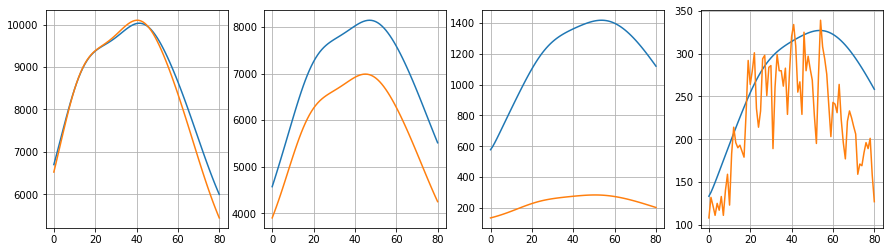

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8144447703829732, 'prob_severe': 0.17551581604990216, 'prob_hosp': 0.2308636804849449, 'prob_soujourn_inf_alpha': 3.410084190393892, 'prob_soujourn_inf_beta': 0.6045371048926647, 'prob_soujourn_symp_alpha': 1.6202338069924305, 'prob_soujourn_symp_beta': 0.21634817636569773} 

811.2126057620978 loss at iteration  31 *** gradients_cummsum =  0.0012804939573604263
798.7438529757409 loss at iteration  32 *** gradients_cummsum =  0.0012580910277600974
786.6939267131585 loss at iteration  33 *** gradients_cummsum =  0.0012360338917947206
775.0496797925622 loss at iteration  34 *** gradients_cummsum =  0.0012143181939084403
763.7983411416226 loss at iteration  35 *** gradients_cummsum =  0.0011929396210007717


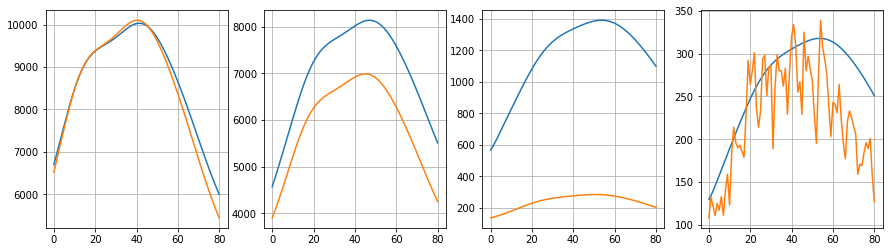

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8138011968705412, 'prob_severe': 0.17245509818756916, 'prob_hosp': 0.22854363489164053, 'prob_soujourn_inf_alpha': 3.410093290913023, 'prob_soujourn_inf_beta': 0.6044869775132427, 'prob_soujourn_symp_alpha': 1.6202594754175224, 'prob_soujourn_symp_beta': 0.2161652255071335} 

752.9275062598057 loss at iteration  36 *** gradients_cummsum =  0.0011718939016329838
742.4251278960014 loss at iteration  37 *** gradients_cummsum =  0.00115117680527313
732.2795069362113 loss at iteration  38 *** gradients_cummsum =  0.0011307841415894731
722.4792834962334 loss at iteration  39 *** gradients_cummsum =  0.0011107117597828828
713.0134282145024 loss at iteration  40 *** gradients_cummsum =  0.0010909555479605673


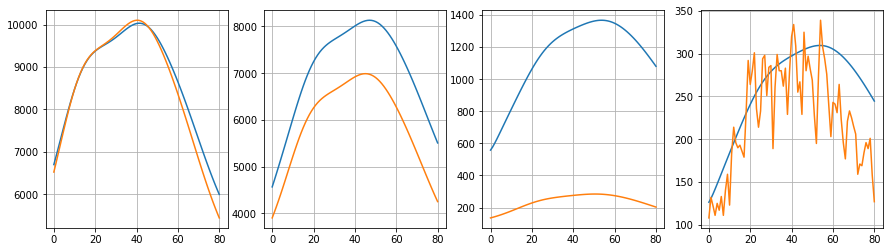

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8132190485127521, 'prob_severe': 0.1696376135126399, 'prob_hosp': 0.22642360648656465, 'prob_soujourn_inf_alpha': 3.410101324390323, 'prob_soujourn_inf_beta': 0.6044427010287532, 'prob_soujourn_symp_alpha': 1.6202822526392102, 'prob_soujourn_symp_beta': 0.2160024678991261} 

703.8712337404346 loss at iteration  41 *** gradients_cummsum =  0.0010715114325495533
695.0423064137863 loss at iteration  42 *** gradients_cummsum =  0.001052375377742546
686.5165581307185 loss at iteration  43 *** gradients_cummsum =  0.0010335433849850543
678.2841983924096 loss at iteration  44 *** gradients_cummsum =  0.0010150114924923053
670.3357265322126 loss at iteration  45 *** gradients_cummsum =  0.0009967757747991828


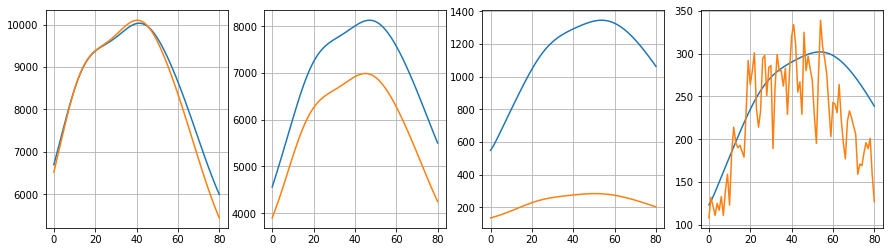

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8126925840052632, 'prob_severe': 0.167047010614036, 'prob_hosp': 0.2244879095150676, 'prob_soujourn_inf_alpha': 3.4101083920201756, 'prob_soujourn_inf_beta': 0.6044037214562328, 'prob_soujourn_symp_alpha': 1.6203024096151153, 'prob_soujourn_symp_beta': 0.2158580392192633} 

662.6619241174956 loss at iteration  46 *** gradients_cummsum =  0.0009788323423414356
655.2538475224384 loss at iteration  47 *** gradients_cummsum =  0.000961177341064854
648.1028206681732 loss at iteration  48 *** gradients_cummsum =  0.0009438069520641535
641.2004279268034 loss at iteration  49 *** gradients_cummsum =  0.0009267173912457502
634.5385071859109 loss at iteration  50 *** gradients_cummsum =  0.0009099049090155862


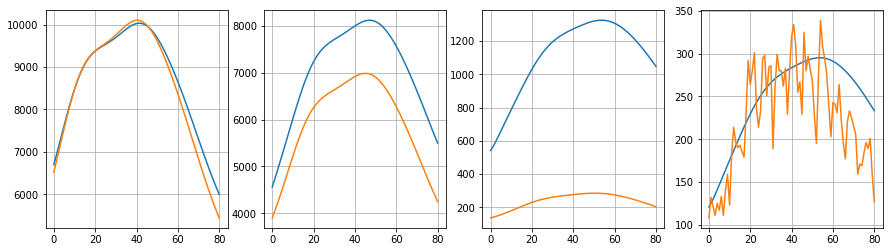

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8122165939129052, 'prob_severe': 0.16466768507549298, 'prob_hosp': 0.22272187122940024, 'prob_soujourn_inf_alpha': 3.410114585358842, 'prob_soujourn_inf_beta': 0.6043695374025166, 'prob_soujourn_symp_alpha': 1.6203201921052648, 'prob_soujourn_symp_beta': 0.21573024321684794} 

628.1091430702988 loss at iteration  51 *** gradients_cummsum =  0.0008933657899926473
621.9046603177993 loss at iteration  52 *** gradients_cummsum =  0.0008770963527421542
615.9176173060798 loss at iteration  53 *** gradients_cummsum =  0.0008610929495299726
610.14079972745 loss at iteration  54 *** gradients_cummsum =  0.0008453519660962396
604.5672144087844 loss at iteration  55 *** gradients_cummsum =  0.0008298698214485715


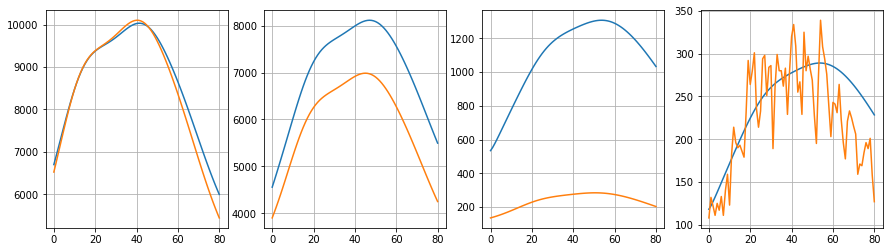

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.811786351010893, 'prob_severe': 0.16248477602778721, 'prob_hosp': 0.2211117928848297, 'prob_soujourn_inf_alpha': 3.4101199872707944, 'prob_soujourn_inf_beta': 0.6043396949319, 'prob_soujourn_symp_alpha': 1.6203358230393416, 'prob_soujourn_symp_beta': 0.21561753686040605} 

599.1900832737336 loss at iteration  56 *** gradients_cummsum =  0.0008146429676695118
594.0028374444662 loss at iteration  57 *** gradients_cummsum =  0.0007996678897429707
588.9991114802654 loss at iteration  58 *** gradients_cummsum =  0.0007849411053914173
584.172737750372 loss at iteration  59 *** gradients_cummsum =  0.0007704591649296571
579.517740938506 loss at iteration  60 *** gradients_cummsum =  0.0007562186511290839


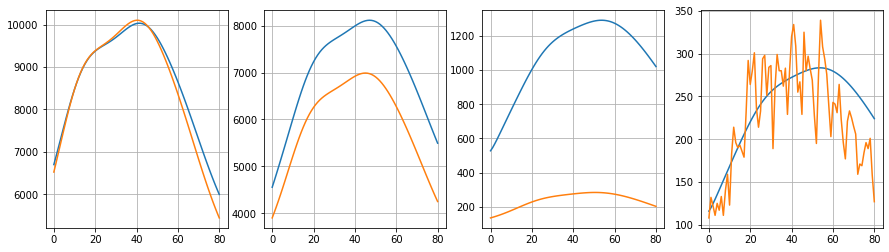

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8113975655271762, 'prob_severe': 0.16048416275763447, 'prob_hosp': 0.2196449098043091, 'prob_soujourn_inf_alpha': 3.410124672773913, 'prob_soujourn_inf_beta': 0.6043137829770656, 'prob_soujourn_symp_alpha': 1.6203495046480283, 'prob_soujourn_symp_beta': 0.21551851681225404} 

575.0283326765735 loss at iteration  61 *** gradients_cummsum =  0.0007422161790939623
570.6989063051262 loss at iteration  62 *** gradients_cummsum =  0.0007284483961477304
566.5240317581513 loss at iteration  63 *** gradients_cummsum =  0.000714911981727685
562.4984505698856 loss at iteration  64 *** gradients_cummsum =  0.0007016036472897817
558.6170710013203 loss at iteration  65 *** gradients_cummsum =  0.000688520136217523


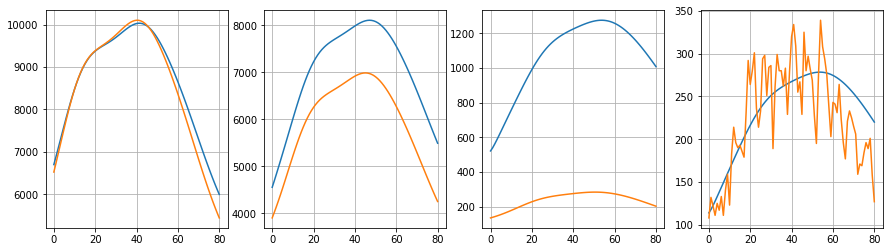

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8110463447353133, 'prob_severe': 0.1586524602115161, 'prob_hosp': 0.21830935050809566, 'prob_soujourn_inf_alpha': 3.410128709796063, 'prob_soujourn_inf_beta': 0.6042914292268547, 'prob_soujourn_symp_alpha': 1.6203614203852772, 'prob_soujourn_symp_beta': 0.2154319071006703} 

554.8749632841535 loss at iteration  66 *** gradients_cummsum =  0.0006756582237428323
551.2673549799784 loss at iteration  67 *** gradients_cummsum =  0.0006630147168656659
547.789626452505 loss at iteration  68 *** gradients_cummsum =  0.0006505864542842965
544.4373064507068 loss at iteration  69 *** gradients_cummsum =  0.0006383703063256472
541.2060678007485 loss at iteration  70 *** gradients_cummsum =  0.0006263631748820775


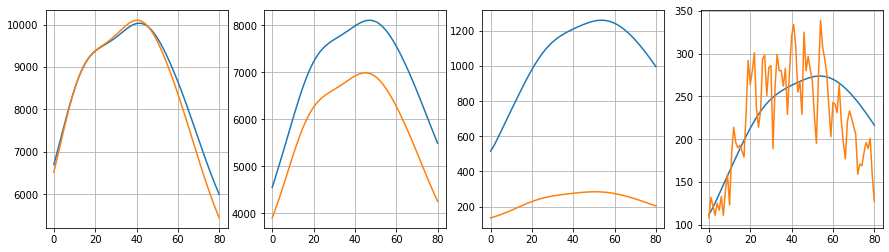

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.810729156419292, 'prob_severe': 0.1569770125241201, 'prob_hosp': 0.21709409503012256, 'prob_soujourn_inf_alpha': 3.4101321598537644, 'prob_soujourn_inf_beta': 0.6042722964338544, 'prob_soujourn_symp_alpha': 1.6203717366647987, 'prob_soujourn_symp_beta': 0.21535654787484784} 

538.0917232046426 loss at iteration  71 *** gradients_cummsum =  0.0006145619933478688
535.090221143578 loss at iteration  72 *** gradients_cummsum =  0.0006029637265599981
532.1976418839129 loss at iteration  73 *** gradients_cummsum =  0.0005915653707390024
529.4101935838353 loss at iteration  74 *** gradients_cummsum =  0.0005803639534306082
526.7242084987433 loss at iteration  75 *** gradients_cummsum =  0.0005693565334485033


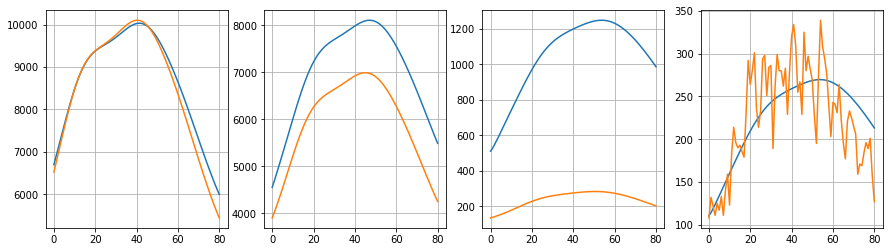

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8104427957938085, 'prob_severe': 0.1554458839783028, 'prob_hosp': 0.21598893263225605, 'prob_soujourn_inf_alpha': 3.410135078662163, 'prob_soujourn_inf_beta': 0.6042560790927569, 'prob_soujourn_symp_alpha': 1.6203806044309816, 'prob_soujourn_symp_beta': 0.2152913851407341} 

524.136139283405 loss at iteration  76 *** gradients_cummsum =  0.0005585402008155226
521.6425553889947 loss at iteration  77 *** gradients_cummsum =  0.0005479120767045057
519.2401395531206 loss at iteration  78 *** gradients_cummsum =  0.0005374693133783087
516.9256843809857 loss at iteration  79 *** gradients_cummsum =  0.0005272090941275244
514.6960890158547 loss at iteration  80 *** gradients_cummsum =  0.0005171286332057365


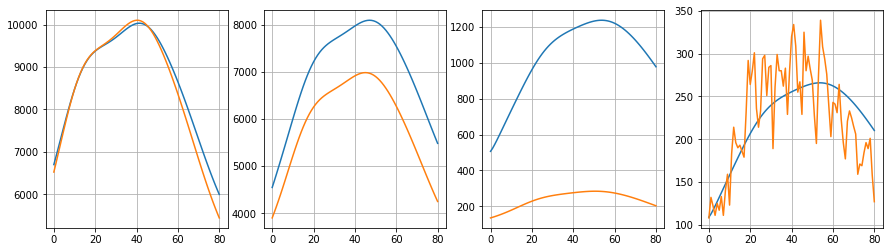

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8101843555169014, 'prob_severe': 0.15404784705582664, 'prob_hosp': 0.21498441918511313, 'prob_soujourn_inf_alpha': 3.410137516684215, 'prob_soujourn_inf_beta': 0.6042425004472228, 'prob_soujourn_symp_alpha': 1.6203881605818389, 'prob_soujourn_symp_beta': 0.21523546138722993} 

512.5483558970034 loss at iteration  81 *** gradients_cummsum =  0.0005072251757638722
510.47958760337553 loss at iteration  82 *** gradients_cummsum =  0.00049749599777928
508.486983781163 loss at iteration  83 *** gradients_cummsum =  0.0004879384059841399
506.56783815358887 loss at iteration  84 *** gradients_cummsum =  0.00047854973778853625
504.7195356111446 loss at iteration  85 *** gradients_cummsum =  0.0004693273612007924


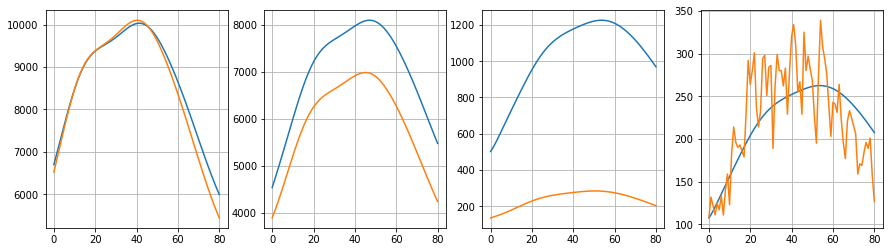

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8099511984776244, 'prob_severe': 0.15277236745781023, 'prob_hosp': 0.2140718345146563, 'prob_soujourn_inf_alpha': 3.410139519625921, 'prob_soujourn_inf_beta': 0.6042313097887253, 'prob_soujourn_symp_alpha': 1.6203945292593351, 'prob_soujourn_symp_beta': 0.21518790702215845} 

502.9395493805995 loss at iteration  86 *** gradients_cummsum =  0.00046026867474405415
501.22543827109354 loss at iteration  87 *** gradients_cummsum =  0.00045137110736799606
499.5748439956517 loss at iteration  88 *** gradients_cummsum =  0.0004426321183568202
497.9854885664984 loss at iteration  89 *** gradients_cummsum =  0.00043404919723220143
496.45517176252486 loss at iteration  90 *** gradients_cummsum =  0.00042561986365225867


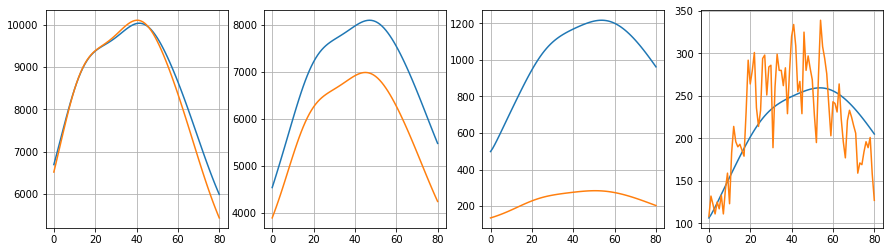

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8097409330806477, 'prob_severe': 0.1516095861561375, 'prob_hosp': 0.2132431400222679, 'prob_soujourn_inf_alpha': 3.41014112888351, 'prob_soujourn_inf_beta': 0.6042222800157208, 'prob_soujourn_symp_alpha': 1.6203998230205203, 'prob_soujourn_symp_beta': 0.21514793254607348} 

494.98176866735287 loss at iteration  91 *** gradients_cummsum =  0.00041734166730604316
493.56322727638354 loss at iteration  92 *** gradients_cummsum =  0.00040921218780186217
492.1975661713018 loss at iteration  93 *** gradients_cummsum =  0.0004012290345518877
490.882872260493 loss at iteration  94 *** gradients_cummsum =  0.0003933898466515653
489.6172985838655 loss at iteration  95 *** gradients_cummsum =  0.0003856922927539723


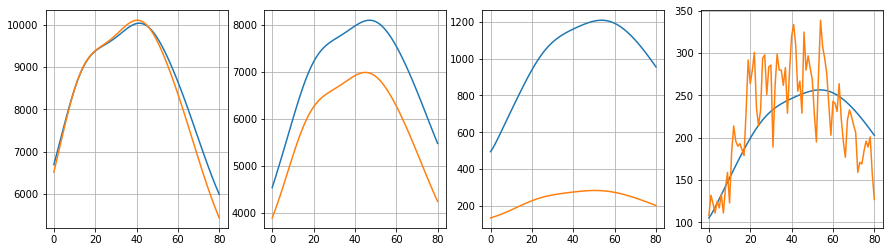

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8095513907831747, 'prob_severe': 0.15055029868028622, 'prob_hosp': 0.21249093687726928, 'prob_soujourn_inf_alpha': 3.410142381947716, 'prob_soujourn_inf_beta': 0.6042152054256151, 'prob_soujourn_symp_alpha': 1.62040414390127, 'prob_soujourn_symp_beta': 0.2151148213994942} 

488.39906218058536 loss at iteration  96 *** gradients_cummsum =  0.0003781340709387598
487.22644201825346 loss at iteration  97 *** gradients_cummsum =  0.0003707129085768658
486.09777698208734 loss at iteration  98 *** gradients_cummsum =  0.00036342656218939803
485.0114639226607 loss at iteration  99 *** gradients_cummsum =  0.0003562728173023264


In [3]:
def get_truthdict_given_mid_end(mid_date,end_date):
#     print(mid_date,end_date, 'mid date end date')
    pd_truthful.start_date = mid_date
    pd_truthful.end_date = end_date
    hd_truthful.start_date = mid_date
    hd_truthful.end_date = end_date
    truthdict = {
    'date':pd_truthful.filtered_data['date'],
    'infections':pd_truthful.filtered_data['infections'],
    'symptomatic':pd_truthful.filtered_data['symptomatic'],
    'severe':pd_truthful.filtered_data['severe'],
    'hosp':hd_truthful.filtered_data['previous_day_admission_adult_covid_confirmed'],
    }

    return truthdict


def add_to_dict(d,g):
    for k in d.keys():
        d[k]=d[k]+g[k]
    return d

def scale_dict_vals(d,s):
    for k in d.keys():
        d[k] = s*d[k]
    return d

def cumsum_dict_vals(d,s):
    cumsum= 0
    for k in d.keys():
        cumsum+=abs(s*d[k])
    return cumsum

import numpy as np
import numpy.random as random
def gradient_descent(pd_list_train, init_params, n_iters=2, step_size=0.001, n_steps_between_print=5, lambda_reg = 1, epsilon_stop=5e-10):
    batch_loss_per_iteration = []
    val_loss_per_iteration = []
    for n in range(n_iters):
        
        batch_loss = 0
        for pd in pd_list_train:
            pd.loss_per_iteration += [0]
        
        #         pd_batch = random.choice(pd_list_train,replace=False, size=3)
        pd_batch = random.choice(pd_list_train,replace=False, size=1)
        if n == 0:
            new_params = init_params
        else:
            new_params = add_to_dict(new_params, scale_dict_vals(grads, -1*step_size))
        
        
        for i,pd in enumerate(pd_batch):
            pd.training_mode=True
            new_grad = pd.get_grad_of_loss(new_params,get_truthdict_given_mid_end(pd.filtered_data['date'][-1], pd.end_date) ,lambda_reg= lambda_reg)
            batch_loss += pd.loss_per_iteration[-1] # pd.loss_per_iteration[-1] is set to loss within get_grad_of_loss call
            if i == 0:
                grads = new_grad
            else:
                grads = add_to_dict(grads, new_grad)
        
        grads = scale_dict_vals(grads, 1/len(pd_batch))
        batch_loss_per_iteration += [batch_loss/len(pd_batch)]
        print(batch_loss/len(pd_batch), 'loss at iteration ', n, '*** gradients_cummsum = ', cumsum_dict_vals(grads, step_size))
#         print(cumsum_dict_vals(grads,1), 'cumsum for ', grads)
        
#         pd_list_val = pd_batch # DEBUG PURPOSES
        
        val_loss_per_iteration += [np.nan]
        if n%n_steps_between_print == 0:
            val_loss = 0              
            for pd in pd_list_val:
                fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4,figsize=(15,4))    
                pd.training_mode=False
                fc_data = pd.get_forecasted_data(new_params) 
                pd.training_mode=True
                truth_data = get_truthdict_given_mid_end(pd.filtered_data['date'][-1],pd.end_date)
                
                ax1.plot(fc_data['infections'])
                ax2.plot(fc_data['symptomatic'])
                ax3.plot(fc_data['severe'])
                ax4.plot(fc_data['hosp'])

                ax1.plot(truth_data['infections'])
                ax2.plot(truth_data['symptomatic'])
                ax3.plot(truth_data['severe'])
                ax4.plot(truth_data['hosp'])
                for i in range(1,5,1):
                    eval('ax' + str(i) + '.grid()') 
                plt.show()
                print('new_params = ',new_params,'\n')
                loss = 0
                for i,k in enumerate(['symptomatic', 'severe','hosp']):
                    val_loss+=np.sum(np.abs(np.array(fc_data[k]) - np.array(truth_data[k]))*np.linspace(0.1, 1, num=len(fc_data[k])) )*(i+1)
            val_loss_per_iteration[-1] = val_loss/len(pd_list_val)
        
        if cumsum_dict_vals(grads, step_size)<epsilon_stop:
            return new_params, batch_loss_per_iteration, val_loss_per_iteration
    return new_params, batch_loss_per_iteration, val_loss_per_iteration

train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
new_params, batch_loss_per_iteration, val_loss_per_iteration = gradient_descent(
    pd_list_train, train_params, n_iters=100, step_size=5e-8, n_steps_between_print=5, lambda_reg=1,epsilon_stop=1e-4)



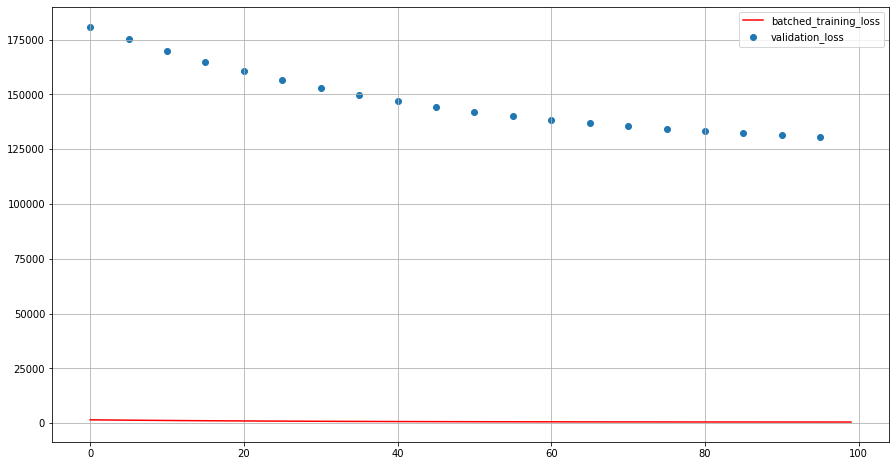

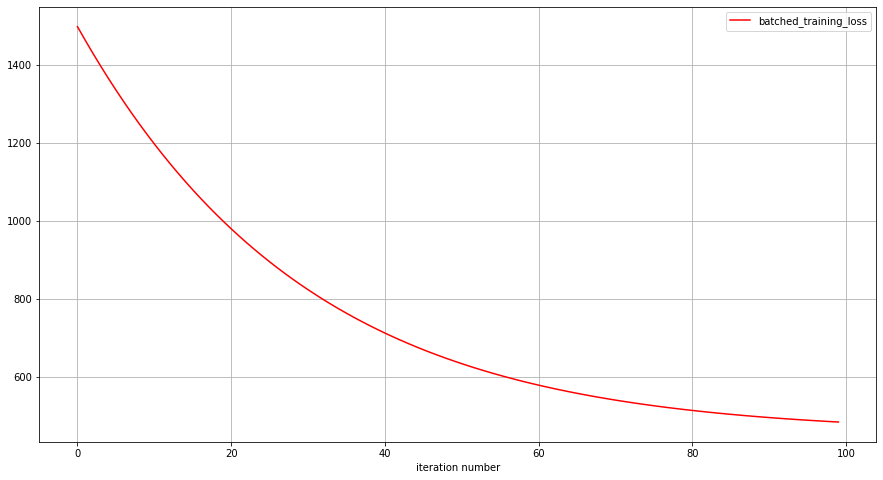

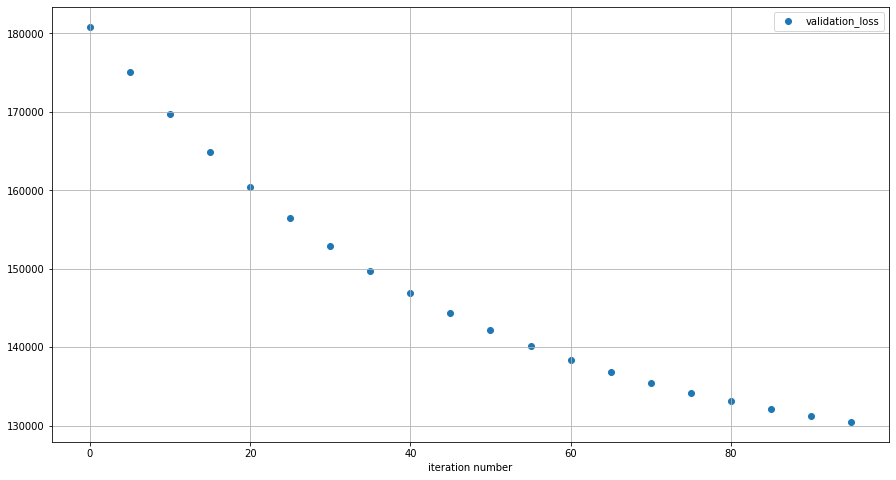

In [4]:
fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
# plt.show()

plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

# print(val_loss_per_iteration)
# import numpy as np
# np.linspace(1, 10, num=10) * np.array(np.linspace(0.1, 1, num=10))


{'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-e205c186d35b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


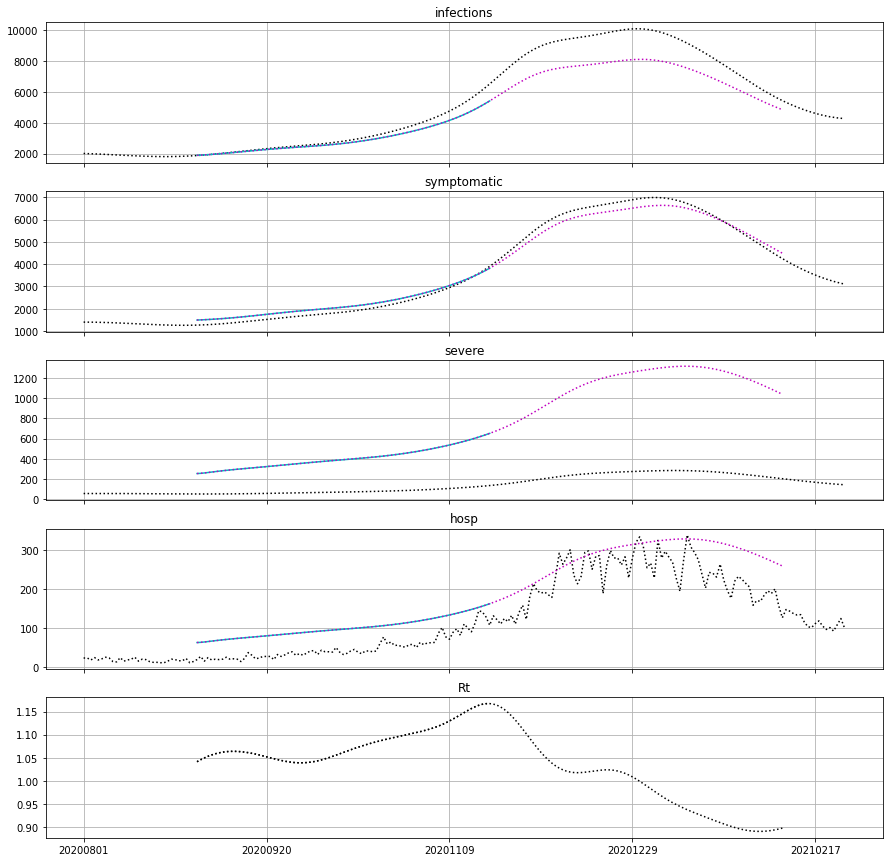

{'T_serial': 5.8, 'prob_sympt': 0.8094133501556972, 'prob_severe': 0.14977160256439342, 'prob_hosp': 0.21193965942199028, 'prob_soujourn_inf_alpha': 3.410143150865279, 'prob_soujourn_inf_beta': 0.6042108276849756, 'prob_soujourn_symp_alpha': 1.6204069625776507, 'prob_soujourn_symp_beta': 0.21509283509826738}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-e205c186d35b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


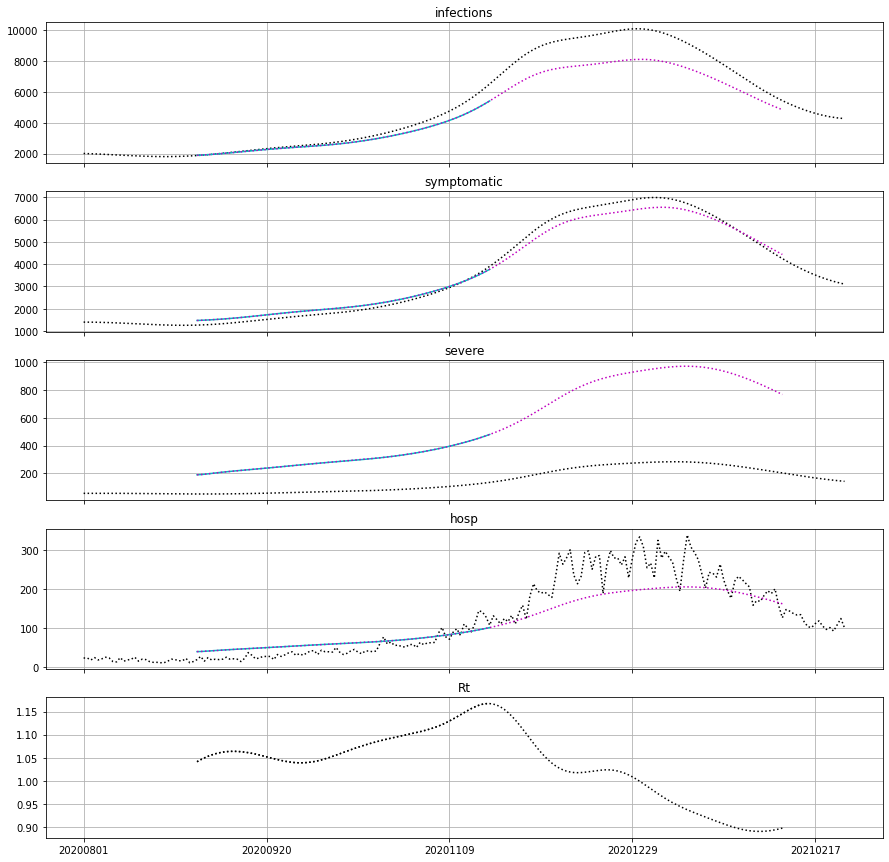

In [5]:
def plot_performance(new_params):
    color_list = ['k','k','k','k','k']
    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=5, ncols=1,figsize=(15,15), sharex=True)   
    truth_data = get_truthdict_given_mid_end('20200801', '20210225')
    print(pd_truthful.start_date, ' to ', pd_truthful.end_date)
    print('cyan = forecasts after being trained on that interval')
    print('violet = forecasts on validation/unseen interval')


    for i,(p,c) in enumerate(zip(['infections', 'symptomatic', 'severe','hosp','Rt'],color_list)):
        if p != 'Rt':
            eval('ax'+str(i+1) + ".plot( truth_data[p], color = c,ls=':' )")
                            
        for pd in pd_list_train:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'c',ls = '-' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")

        #         for pd in pd_list_val:
        for pd in pd_list_train:
            pd.training_mode = False
            end_date_original = pd.end_date
            pd.end_date = str((datetime.datetime.strptime(str(end_date_original),'%Y%m%d') + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d'))
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'm',ls = ':' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")
            
            pd.end_date = end_date_original
        eval('ax'+str(i+1) + '.set_title(p)')
        eval('ax'+str(i+1) + '.grid()')
    # current_labels = ax4.get_xticklabels()

    #     eval('ax'+str(i+1) + ".set_xticklabels( [str(d) for d in list(truth_data['date']) ] )" )
    current_labels = ax4.get_xticks();
    date_labels = [truth_data['date'][int(jj)] for jj in list(current_labels[1:-1]) ]

    ax4.set_xticklabels(['']+ date_labels)

# train_params = {'T_serial':5.8,'prob_sympt':0.536,'prob_severe':0.1,'prob_hosp':0.55,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
print(train_params)
plot_performance(train_params)
plt.show()

print(new_params)
plot_performance(new_params)


In [6]:
import pickle


filename = state_short + '_population_params'
with open(filename+'.pickle', 'wb') as handle:
    pickle.dump(new_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename+'.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (new_params == b)
print(new_params)

True
{'T_serial': 5.8, 'prob_sympt': 0.8094133501556972, 'prob_severe': 0.14977160256439342, 'prob_hosp': 0.21193965942199028, 'prob_soujourn_inf_alpha': 3.410143150865279, 'prob_soujourn_inf_beta': 0.6042108276849756, 'prob_soujourn_symp_alpha': 1.6204069625776507, 'prob_soujourn_symp_beta': 0.21509283509826738}


In [7]:
a = [1.0414056867126864, 1.045738718947992, 1.049645937203434, 1.0531059433204188, 1.056099491017124, 1.0586077984700395, 1.0606129085859002, 1.0621144550079618, 1.0631391597380282, 1.0637168201424787, 1.063877921158446, 1.0636535117270811, 1.063075563823081, 1.06217745016898, 1.0609929123049715, 1.0595558191340837, 1.0579000814535389, 1.0560635045480908, 1.0540966198222228, 1.0520522917059605, 1.0499830180479908, 1.0479409004424465, 1.045978592380756, 1.0441530075662602, 1.0425221082614338, 1.0411435675900995, 1.040074888234737, 1.0393691172058153, 1.0390466940571577, 1.0391137172452158, 1.039576616296324, 1.0404422435941652, 1.0417151035108625, 1.043367617528996, 1.0453513908275955, 1.0476176105202242, 1.050117251545854, 1.0528009994459115, 1.0556199553137935, 1.058525503985993, 1.061468527210398, 1.0643993499081252, 1.0672682325757905, 1.0700441715472546, 1.0727209556155135, 1.075294023857072, 1.077758805837276, 1.0801107800866736, 1.082351015904942, 1.0844910249235518, 1.0865435733185682, 1.0885215467526603, 1.0904379357652982, 1.092303914057905, 1.0941255593090653, 1.095908121436799, 1.0976568782506102, 1.0993771324101034, 1.1010797468389129, 1.1027978244713814, 1.1045702094360983, 1.1064359715055287, 1.1084344246441702, 1.1106053773719848, 1.1129902740634583, 1.115631440340607, 1.118571675900468, 1.121854344747914, 1.125515915207308, 1.1295236423344377, 1.1338066760990442, 1.1382927981293978, 1.1429086303813023, 1.1475755041745832, 1.1521529036480076, 1.1564512890668055, 1.1602772068277076, 1.163435138901248, 1.1657299638741223, 1.1670065175068989, 1.167154848979851, 1.1660704093725531, 1.163652979488092, 1.159809352532886, 1.1545425852387183, 1.1479995705319073, 1.140341058787823, 1.131728052671144, 1.1223205737456752, 1.1123071808559624, 1.1019401565832945, 1.0914729421328588, 1.081150056253023, 1.0712070408362164, 1.061847784976684, 1.0531941146572743, 1.0453492526820096, 1.0384143761064648, 1.032489467307816, 1.0276499743747416, 1.0238541965095556, 1.0210277442394735, 1.0190994812047691, 1.01800093520834, 1.0176573398112794, 1.0179333303145317, 1.0186665777330592, 1.0196947701808097, 1.0208551991566466, 1.0219867194175, 1.02295360248508, 1.0236365714492646, 1.023916596900608, 1.0236750632096892, 1.0227978283931451, 1.0212410268339005, 1.0190253690825244, 1.0161752927307537, 1.0127164854346895, 1.0086766838097756, 1.0041212147765222, 0.9991628134634488, 0.9939160363827212, 0.9884936138734632, 0.9830059938064204, 0.9775463380575976, 0.9721781383026686, 0.9669604762716856, 0.9619511197435796, 0.95720657034414, 0.9527613989368624, 0.9485936804307058, 0.9446726336726567, 0.9409680142577732, 0.9374500565236534, 0.9340889047427764, 0.9308530276654378, 0.9277107722459847, 0.924630863484423, 0.9215823903179052, 0.9185405139072842, 0.9155147977966708, 0.9125272434749367, 0.9095995344115916, 0.9067530205400042, 0.9040103969246914, 0.9014093375500692, 0.8989952714155099, 0.8968132134977301, 0.8949077829042015, 0.8933221994103172, 0.8920827380400209, 0.891202847405115, 0.8906958981120509, 0.8905755795581267, 0.8908552643442027, 0.8915298102087126, 0.8925737914192805, 0.8939610211040494, 0.8956655028377412, 0.8976614459752816, 0.8999292478855966, 0.9024589050739432, 0.9052413215671404, 0.9082674663237208, 0.9115284082799748, 0.9150278123875828, 0.9187977191553024, 0.9228746915592012, 0.9272961491029412, 0.9321004850553548, 0.9373234368111, 0.9429894962096708, 0.9491215938825914, 0.9557436824024744, 0.96288082768806, 0.9705501375656792, 0.97872452840575, 0.9873624660247766, 0.9964211910928132, 1.0058565038345315, 1.015620053563779, 1.0256428364443009, 1.0358445369745428, 1.046141466838842, 1.0564464921698702, 1.0666704588597395, 1.0767380211971422, 1.0865823753324495, 1.0961347768198682, 1.1053245154972045, 1.1140804879459645, 1.1223574045462503, 1.1301347244411708, 1.1373932262911448, 1.1441141590258237, 1.1502796942948947, 1.1558877892634722, 1.160957138010133, 1.1655089876100169, 1.1695657175947505, 1.1731509153666506, 1.1763086304887171, 1.1791202575445898, 1.1816722563984925, 1.1840519831200709, 1.186347550986801, 1.18867933009106, 1.1912540726691014, 1.1942944521843917, 1.1980254038130191, 1.2026750682766325]
print(len(a))

212
